#### Data Cleaning Female Labour Force

In [1]:
import pandas as pd

raw_df = pd.read_csv('./Filtered_Female_Labour_Force_Dataset__Countries_Only_.csv')
raw_df

,Unnamed: 0,"﻿""Country Name",Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 69
0,0,"Aruba,ABW""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Afghanistan,AFG""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.141,21.227,19.836,18.402,16.463,14.787,5.153,4.828,NaN,NaN
2,4,"Angola,AGO""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.700,73.462,73.224,72.985,73.047,74.694,72.843,72.760,NaN,NaN
3,5,"Albania,ALB""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.763,49.609,51.284,52.815,50.089,51.788,52.919,52.824,NaN,NaN
4,6,"Andorra,AND""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,260,"Samoa,WSM""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,41.044,41.044,41.134,41.062,40.683,40.980,41.342,41.404,NaN,NaN
227,261,"Kosovo,XKX""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,262,"Yemen, Rep.,YEM""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.142,5.123,5.124,5.127,5.091,4.948,5.016,5.102,NaN,NaN
229,264,"Zambia,ZMB""","Labor force participation rate, female (% of f...",SL.TLF.CACT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,51.957,52.062,52.182,52.204,54.436,54.160,52.140,52.149,NaN,NaN


In [2]:
processed_df = raw_df.iloc[:, 1:].copy()
processed_df['Country Name'] = processed_df.iloc[:,0]
processed_df['Country Name'] = processed_df['Country Name'].str.strip('"')
processed_df["Country Code"] = processed_df["Country Name"].str[-3:]

In [3]:
clean_df = processed_df.copy()
clean_df["Country Name"] = processed_df["Country Name"].str[:-4]

In [4]:
filtered_dataframe = clean_df.iloc[:, 1:]
filtered_dataframe.set_index("Country Name", inplace=True)
filtered_dataframe.drop(columns=filtered_dataframe.columns[1:33], inplace=True)
filtered_dataframe = filtered_dataframe[
    ~((filtered_dataframe.drop(columns=["Country Code"]).isna() | (filtered_dataframe.drop(columns=["Country Code"]) == 0)).all(axis=1))
]
filtered_dataframe = filtered_dataframe.iloc[:, :-2]


filtered_dataframe

,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,15.635,15.698,15.715,15.726,15.796,15.634,15.479,15.363,15.286,...,18.088,19.096,20.141,21.227,19.836,18.402,16.463,14.787,5.153,4.828
Angola,AGO,75.489,75.481,75.485,75.499,75.520,75.515,75.522,75.540,75.566,...,74.171,73.936,73.700,73.462,73.224,72.985,73.047,74.694,72.843,72.760
Albania,ALB,53.130,53.737,52.962,52.316,51.374,50.760,51.553,50.943,50.132,...,43.818,46.989,49.763,49.609,51.284,52.815,50.089,51.788,52.919,52.824
Argentina,ARG,46.494,47.634,48.844,49.664,48.938,49.718,50.951,51.462,50.666,...,47.429,47.512,47.598,47.685,49.165,50.020,46.506,50.283,50.366,50.840
Armenia,ARM,58.428,58.150,57.687,57.243,56.879,56.615,56.406,56.237,56.077,...,55.548,55.651,55.719,55.772,55.765,57.625,57.689,58.156,56.491,56.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,VUT,60.700,60.707,60.830,60.444,60.539,60.529,60.348,60.387,60.483,...,60.565,60.715,60.595,60.377,60.355,60.309,59.736,60.283,60.434,60.601
Samoa,WSM,42.709,42.776,42.631,42.831,42.551,42.257,42.266,42.198,42.130,...,41.342,41.245,41.044,41.044,41.134,41.062,40.683,40.980,41.342,41.404
"Yemen, Rep.",YEM,16.452,16.581,16.560,16.691,17.600,18.545,19.527,20.545,21.606,...,5.974,5.176,5.142,5.123,5.124,5.127,5.091,4.948,5.016,5.102


In [5]:
zero_values = (filtered_dataframe == 0).any().any()
nan_values = filtered_dataframe.isna().any().any()

print(f"Are there any zero values in the dataset? {'Yes' if zero_values else 'No'}")
print(f"Are there any NaN values in the dataset? {'Yes' if nan_values else 'No'}")

Are there any zero values in the dataset? No
Are there any NaN values in the dataset? Yes


In [6]:
countries_with_nan = filtered_dataframe[filtered_dataframe.isna().any(axis=1)]
print(countries_with_nan)


                   Country Code    1990    1991    1992    1993    1994  \
Country Name                                                              
West Bank and Gaza          PSE  12.361  12.347  12.335  12.327  12.324   
Ukraine                     UKR  53.507  53.437  53.371  53.307  53.246   

                      1995    1996    1997    1998  ...    2013   2014  \
Country Name                                        ...                  
West Bank and Gaza  12.310  12.321  12.355  12.406  ...  16.567  17.99   
Ukraine             53.186  53.127  53.066  53.006  ...  50.690  50.40   

                      2015    2016    2017    2018    2019    2020   2021  \
Country Name                                                                
West Bank and Gaza  17.416  17.638  17.638  18.347  16.401  17.507  18.89   
Ukraine             50.113  49.827  49.542  49.260  48.151  47.791    NaN   

                    2022  
Country Name              
West Bank and Gaza   NaN  
Ukraine     

In [7]:
def fill_nan_with_average(df):
    for col in df.columns:
        df[col] = df[col].interpolate(method='linear', limit_direction='both', axis=0)
    return df

# Applying the function to the dataset
filtered_data_filled = fill_nan_with_average(filtered_dataframe)

# Displaying the resulting dataset
print(filtered_data_filled)

             Country Code    1990    1991    1992    1993    1994    1995  \
Country Name                                                                
Afghanistan           AFG  15.635  15.698  15.715  15.726  15.796  15.634   
Angola                AGO  75.489  75.481  75.485  75.499  75.520  75.515   
Albania               ALB  53.130  53.737  52.962  52.316  51.374  50.760   
Argentina             ARG  46.494  47.634  48.844  49.664  48.938  49.718   
Armenia               ARM  58.428  58.150  57.687  57.243  56.879  56.615   
...                   ...     ...     ...     ...     ...     ...     ...   
Vanuatu               VUT  60.700  60.707  60.830  60.444  60.539  60.529   
Samoa                 WSM  42.709  42.776  42.631  42.831  42.551  42.257   
Yemen, Rep.           YEM  16.452  16.581  16.560  16.691  17.600  18.545   
Zambia                ZMB  51.853  51.877  51.912  51.950  51.987  52.003   
Zimbabwe              ZWE  59.796  59.888  60.018  60.156  60.279  60.357   

C:\Users\leona\AppData\Local\Temp\ipykernel_40220\3119787777.py:3: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df[col] = df[col].interpolate(method='linear', limit_direction='both', axis=0)


In [8]:
zero_values = (filtered_data_filled == 0).any().any()
nan_values = filtered_data_filled.isna().any().any()

print(f"Are there any zero values in the dataset? {'Yes' if zero_values else 'No'}")
print(f"Are there any NaN values in the dataset? {'Yes' if nan_values else 'No'}")

Are there any zero values in the dataset? No
Are there any NaN values in the dataset? No


#### Data Analysis: WorldWide 

In [9]:
import matplotlib.pyplot as plt

worldwide_df = filtered_data_filled.iloc[:, :-1].apply(pd.to_numeric, errors="coerce")

average_values = worldwide_df.drop(columns=["Country Code"]).mean(axis=1)
top_10_countries = average_values.nlargest(10)
bottom_10_countries = average_values.nsmallest(10)
trend_over_time = worldwide_df.drop(columns=["Country Code"]).mean(axis=0)

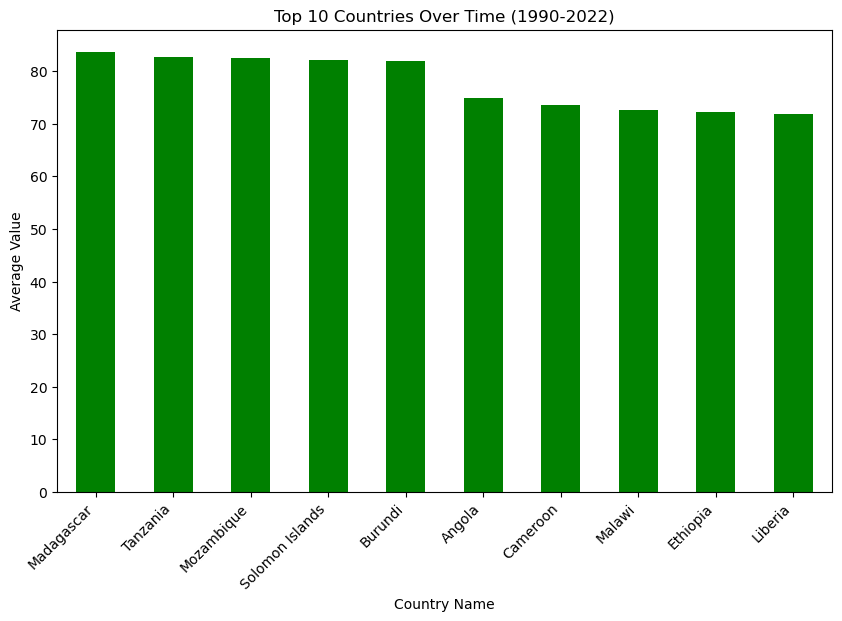

In [10]:
#Top 10 Countries
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind="bar", color="green")
plt.title("Top 10 Countries Over Time (1990-2022)")
plt.ylabel("Average Value")
plt.xlabel("Country Name")
plt.xticks(rotation=45, ha="right")
plt.show()

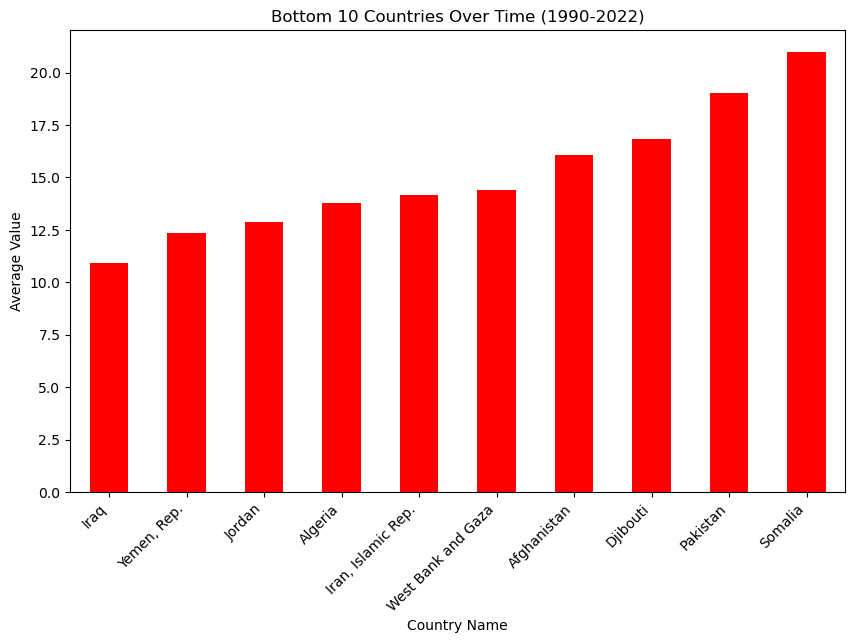

In [11]:
# Plot Bottom 10 Countries
plt.figure(figsize=(10, 6))
bottom_10_countries.plot(kind="bar", color="red")
plt.title("Bottom 10 Countries Over Time (1990-2022)")
plt.ylabel("Average Value")
plt.xlabel("Country Name")
plt.xticks(rotation=45, ha="right")
plt.show()

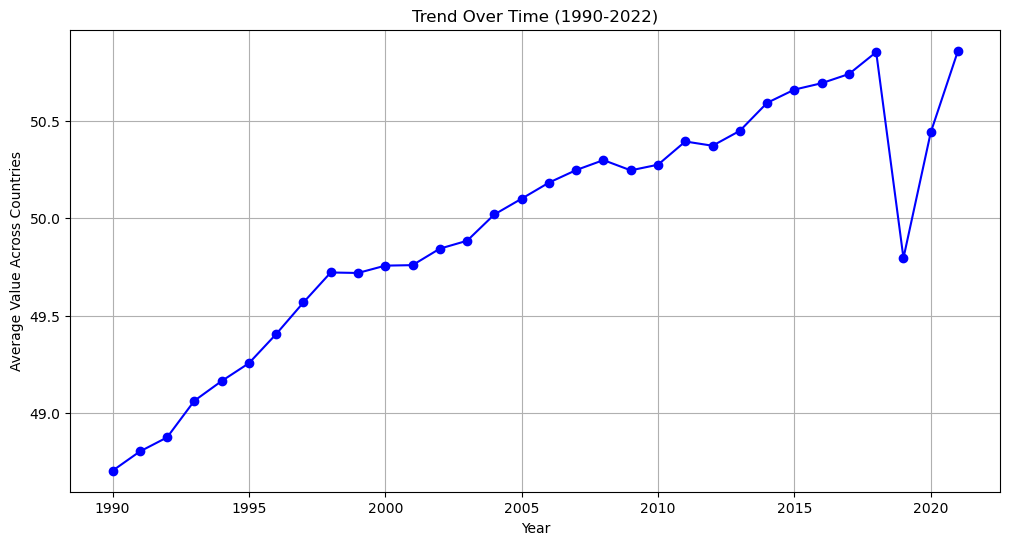

In [12]:
# Plot Trend Over Time
plt.figure(figsize=(12, 6))
trend_over_time.plot(kind="line", marker="o", color="blue")
plt.title("Trend Over Time (1990-2022)")
plt.ylabel("Average Value Across Countries")
plt.xlabel("Year")
plt.grid()
plt.show()

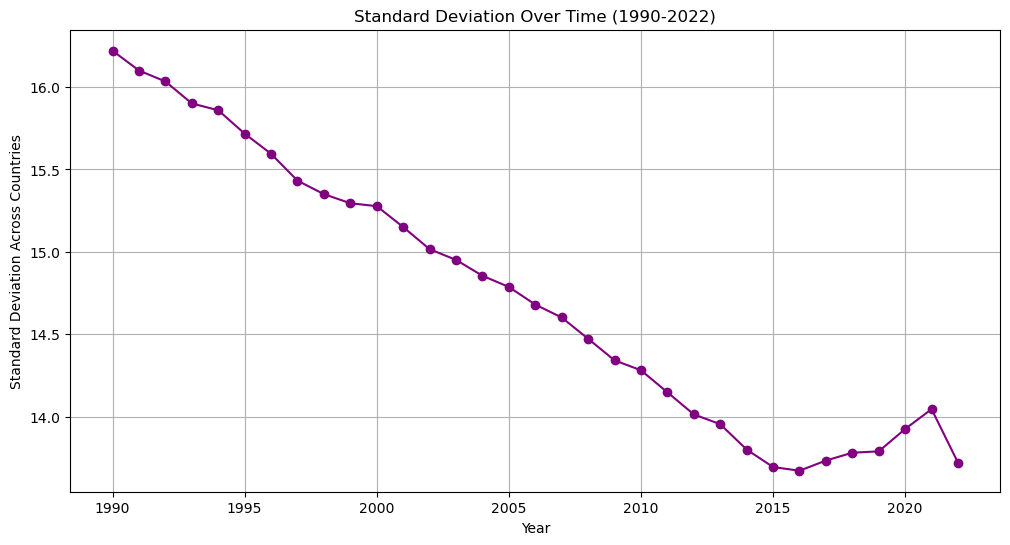

In [13]:
# Standard Deviation by Year
std_dev_by_year = filtered_data_filled.drop(columns=["Country Code"]).std(axis=0)
plt.figure(figsize=(12, 6))
std_dev_by_year.plot(kind="line", marker="o", color="purple")
plt.title("Standard Deviation Over Time (1990-2022)")
plt.ylabel("Standard Deviation Across Countries")
plt.xlabel("Year")
plt.grid()
plt.show()


If the standard deviation decreases over time, it indicates that the values across countries are becoming more similar. In our case, it suggests that female labor force participation rates are converging across countries.


#### Data Analysis: Europe

In [14]:
european_countries = [
    "ALB", "AND", "AUT", "BEL", "BIH", "BGR", "BLR", "CHE", "CYP", "CZE", "DEU", "DNK", "ESP",
    "EST", "FIN", "FRA", "GBR", "GRC", "HRV", "HUN", "IRL", "ISL", "ITA", "KOS", "LIE", "LTU",
    "LUX", "LVA", "MDA", "MCO", "MKD", "MLT", "MNE", "NLD", "NOR", "POL", "PRT", "ROU", "RUS",
    "SMR", "SRB", "SVK", "SVN", "SWE", "UKR"
]

european_dataframe = filtered_data_filled[filtered_data_filled["Country Code"].isin(european_countries)]

In [15]:
import matplotlib.pyplot as plt

europe_df = european_dataframe.iloc[:, :-1].apply(pd.to_numeric, errors="coerce")

average_values = europe_df.drop(columns=["Country Code"]).mean(axis=1)
top_5_countries = average_values.nlargest(5)
bottom_5_countries = average_values.nsmallest(5)
trend_over_time_eu = europe_df.drop(columns=["Country Code"]).mean(axis=0)

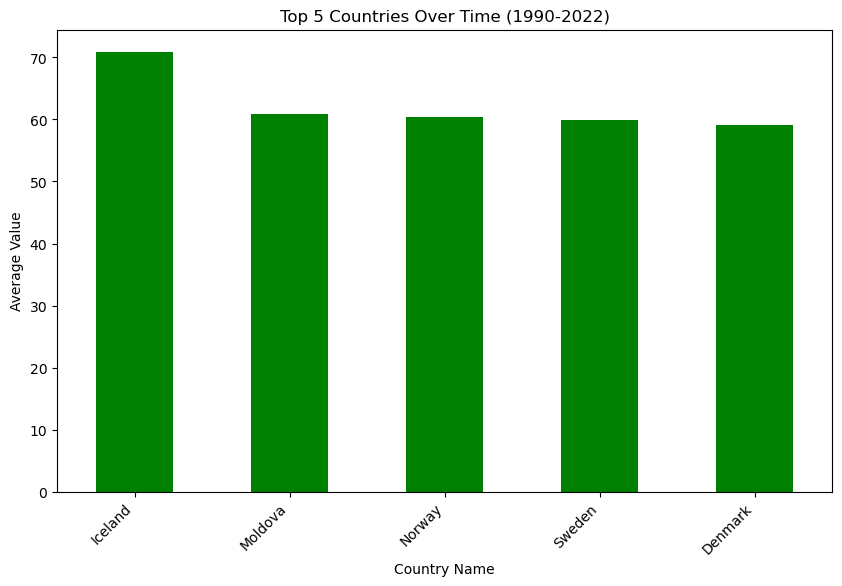

In [16]:
# Top 5 Countries
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind="bar", color="green")
plt.title("Top 5 Countries Over Time (1990-2022)")
plt.ylabel("Average Value")
plt.xlabel("Country Name")
plt.xticks(rotation=45, ha="right")
plt.show()

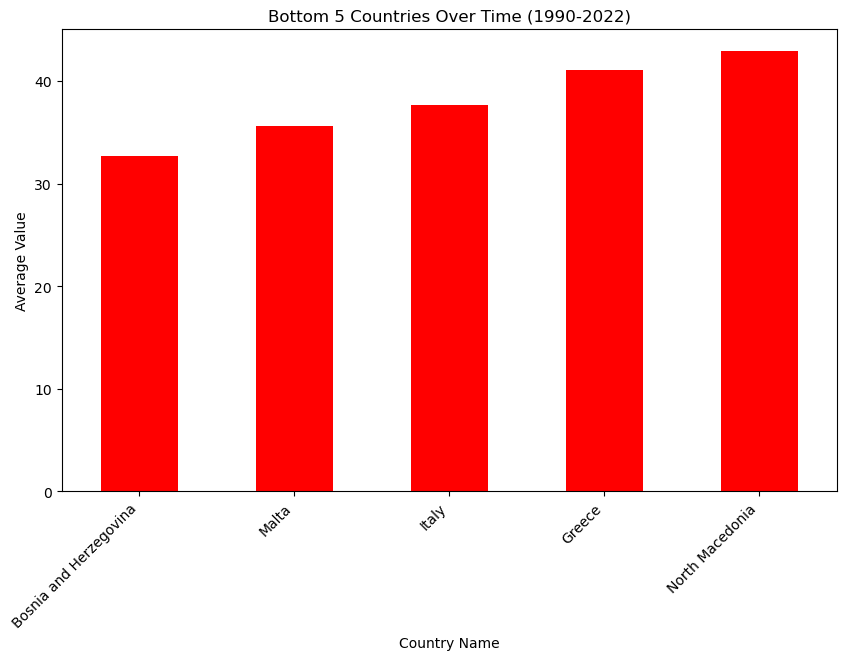

In [17]:
# Bottom 5 Countries
plt.figure(figsize=(10, 6))
bottom_5_countries.plot(kind="bar", color="red")
plt.title("Bottom 5 Countries Over Time (1990-2022)")
plt.ylabel("Average Value")
plt.xlabel("Country Name")
plt.xticks(rotation=45, ha="right")
plt.show()

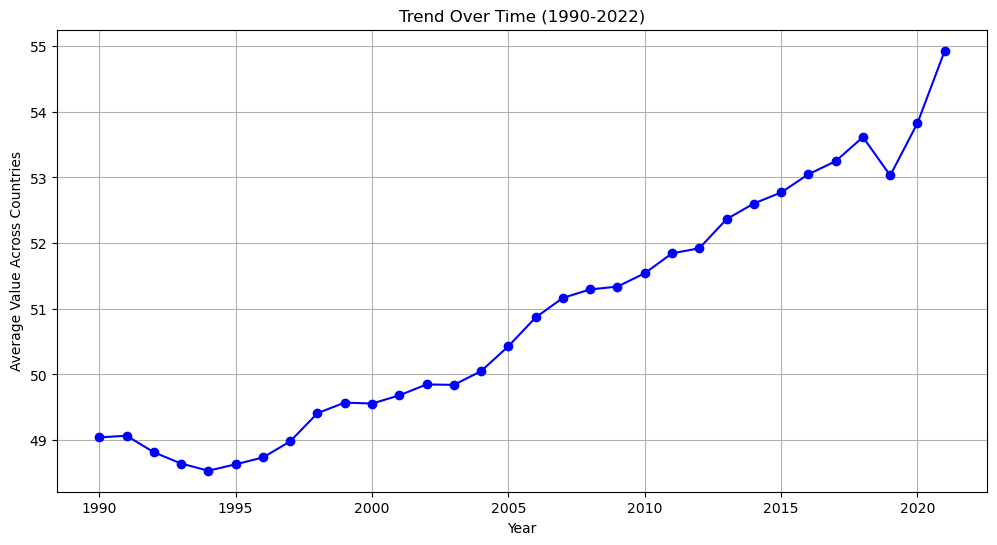

In [18]:
# Plot Trend Over Time
plt.figure(figsize=(12, 6))
trend_over_time_eu.plot(kind="line", marker="o", color="blue")
plt.title("Trend Over Time (1990-2022)")
plt.ylabel("Average Value Across Countries")
plt.xlabel("Year")
plt.grid()
plt.show()

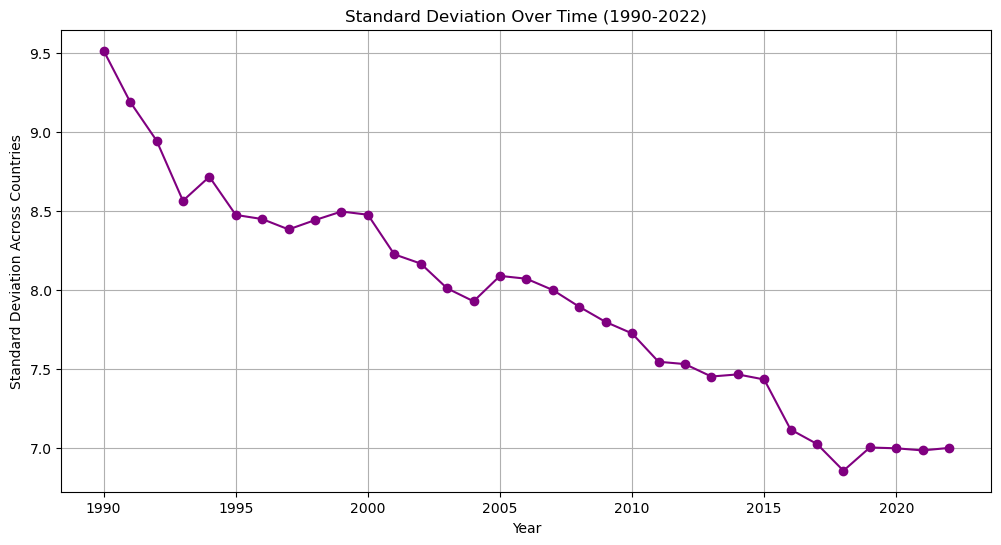

In [19]:
# Additional Analysis: Standard Deviation by Year
std_dev_by_year = european_dataframe.drop(columns=["Country Code"]).std(axis=0)
plt.figure(figsize=(12, 6))
std_dev_by_year.plot(kind="line", marker="o", color="purple")
plt.title("Standard Deviation Over Time (1990-2022)")
plt.ylabel("Standard Deviation Across Countries")
plt.xlabel("Year")
plt.grid()
plt.show()

In [20]:
filtered_data_filled.to_csv('df_female_labor.csv', index=True)